In [1]:
from ase.io import read
atoms=read('/home/emi/lammps/aSi-4096/optimized.data',format='lammps-data',style='atomic')
natom=len(atoms.positions)

In [2]:
import numpy as np

eigenvalue=np.load('eigenvalue_4096.npy')
eigenvector=np.load('eigenvector_4096.npy')

In [3]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
nmodes=len(eigenvalue)
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=0
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_THz
        omega.append(val)

In [4]:
import numpy as np
C_L=np.load('C_L_4096.npy')
C_T=np.load('C_T_4096.npy')

In [5]:
mesh_energy=np.linspace(0,15,200)

In [6]:
import pyAF.postprocess
dsf_L, dsf_T=pyAF.postprocess.dynamic_structure_factor(C_L=C_L, C_T=C_T, mesh_energy=mesh_energy, frequency=omega, smearing=0.005)

In [7]:
kmin=2.0*np.pi/atoms.cell[0,0]
kmax=kmin*10
kvec=np.linspace(kmin,kmax,10)

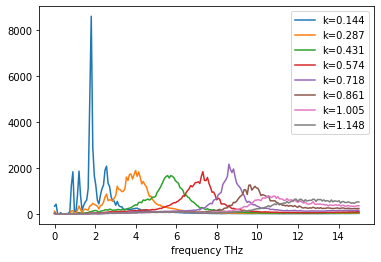

In [8]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_L[0,:],label='k={0:.3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_L[1,:],label='k={0:.3f}'.format(kvec[1]))
plt.plot(mesh_energy,dsf_L[2,:],label='k={0:.3f}'.format(kvec[2]))
plt.plot(mesh_energy,dsf_L[3,:],label='k={0:.3f}'.format(kvec[3]))
plt.plot(mesh_energy,dsf_L[4,:],label='k={0:.3f}'.format(kvec[4]))
plt.plot(mesh_energy,dsf_L[5,:],label='k={0:.3f}'.format(kvec[5]))
plt.plot(mesh_energy,dsf_L[6,:],label='k={0:.3f}'.format(kvec[6]))
plt.plot(mesh_energy,dsf_L[7,:],label='k={0:.3f}'.format(kvec[7]))

plt.xlabel('frequency THz')
plt.legend()
plt.savefig('S_L_4096atom.png',dpi=600)

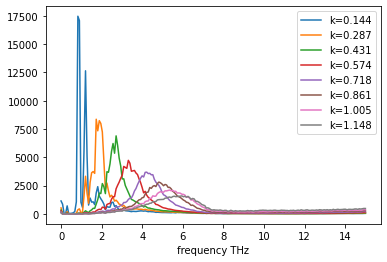

In [9]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_T[0,:],label='k={0:.3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_T[1,:],label='k={0:.3f}'.format(kvec[1]))
plt.plot(mesh_energy,dsf_T[2,:],label='k={0:.3f}'.format(kvec[2]))
plt.plot(mesh_energy,dsf_T[3,:],label='k={0:.3f}'.format(kvec[3]))
plt.plot(mesh_energy,dsf_T[4,:],label='k={0:.3f}'.format(kvec[4]))
plt.plot(mesh_energy,dsf_T[5,:],label='k={0:.3f}'.format(kvec[5]))
plt.plot(mesh_energy,dsf_T[6,:],label='k={0:.3f}'.format(kvec[6]))
plt.plot(mesh_energy,dsf_T[7,:],label='k={0:.3f}'.format(kvec[7]))

plt.xlabel('frequency THz')
plt.legend()
plt.savefig('S_T_4096atom.png',dpi=600)

ver3 で作成したデータと比較

In [10]:
import numpy as np
C_L_v3=np.load('C_L_4096_v3.npy')
C_T_v3=np.load('C_T_4096_v3.npy')

In [11]:
import pyAF.postprocess
dsf_L_v3, dsf_T_v3=pyAF.postprocess.dynamic_structure_factor(C_L=C_L_v3, C_T=C_T_v3, mesh_energy=mesh_energy, frequency=omega, smearing=0.005)

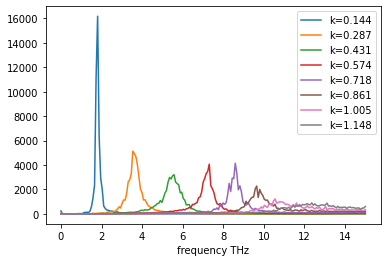

In [12]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_L_v3[0,:],label='k={0:.3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_L_v3[1,:],label='k={0:.3f}'.format(kvec[1]))
plt.plot(mesh_energy,dsf_L_v3[2,:],label='k={0:.3f}'.format(kvec[2]))
plt.plot(mesh_energy,dsf_L_v3[3,:],label='k={0:.3f}'.format(kvec[3]))
plt.plot(mesh_energy,dsf_L_v3[4,:],label='k={0:.3f}'.format(kvec[4]))
plt.plot(mesh_energy,dsf_L_v3[5,:],label='k={0:.3f}'.format(kvec[5]))
plt.plot(mesh_energy,dsf_L_v3[6,:],label='k={0:.3f}'.format(kvec[6]))
plt.plot(mesh_energy,dsf_L_v3[7,:],label='k={0:.3f}'.format(kvec[7]))

plt.xlabel('frequency THz')
plt.legend()
plt.savefig('S_L_v3_4096atom.png',dpi=600)

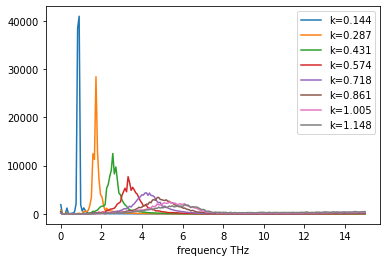

In [13]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_T_v3[0,:],label='k={0:.3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_T_v3[1,:],label='k={0:.3f}'.format(kvec[1]))
plt.plot(mesh_energy,dsf_T_v3[2,:],label='k={0:.3f}'.format(kvec[2]))
plt.plot(mesh_energy,dsf_T_v3[3,:],label='k={0:.3f}'.format(kvec[3]))
plt.plot(mesh_energy,dsf_T_v3[4,:],label='k={0:.3f}'.format(kvec[4]))
plt.plot(mesh_energy,dsf_T_v3[5,:],label='k={0:.3f}'.format(kvec[5]))
plt.plot(mesh_energy,dsf_T_v3[6,:],label='k={0:.3f}'.format(kvec[6]))
plt.plot(mesh_energy,dsf_T_v3[7,:],label='k={0:.3f}'.format(kvec[7]))

plt.xlabel('frequency THz')
plt.legend()
plt.savefig('S_T_v3_4096atom.png',dpi=600)